In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
class LotkaVolterra:
    def __init__(self,k_a,k_ca,k_c,k_ac):
        self.k_a = k_a
        self.k_ca = k_ca
        self.k_c = k_c
        self.k_ac = k_ac

    def __call__(self,x,t):
        y = np.zeros(len(x))
        y[0] = self.k_a*x[0]-self.k_ca*x[0]*x[1]
        y[1] = -self.k_c*x[1]+self.k_ac*x[0]*x[1]

        return y

In [4]:
class Logistic:
    def __init__(self,nu,C):
        self.nu = nu
        self.C = C

    def __call__(self,x,t):
        return self.nu*(1-x/self.C)*x

In [5]:
class ExplicitEuler:
    def __init__(self,f):
        self.f = f

    def iterate(self,x0,t,dt):
        return x0+dt*self.f(x0,t)

In [6]:
class RK2:
    def __init__(self,f):
        self.f = f

    def iterate(self,x0,t,dt):
        return x0+dt*self.f(x0+dt/2*self.f(x0,t),t+dt/2)

In [7]:
class Integrator:
    def __init__(self,method,x0,tMin,tMax,N):
        self.x0   = x0
        self.tMin = tMin
        self.tMax = tMax
        self.dt   = (tMax - tMin)/(N-1)

        self.f = method

    def getIntegrationTime(self):
        return np.arange(self.tMin,self.tMax+self.dt,self.dt)
        

    def integrate(self):
        x = np.array([self.x0])
        for t in np.arange(self.tMin,self.tMax,self.dt):
            x = np.append( x, [self.f.iterate(x[-1,:],t,self.dt)],axis=0)
        return x

In [8]:
def plotData(x,y,color,legend):
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    plt.rc('xtick', labelsize=20)    
    plt.rc('ytick', labelsize=20)    
    plt.ylabel('$a(t),c(t)$',fontsize=20)
    plt.xlabel('$t$', fontsize=20)

    plt.plot(x,y,color,linewidth=2.0,label=legend)
    plt.legend(loc=2,prop={'size':20})

In [9]:
def parametricPlotData(x,y,color,xAxis,yAxis,legend):
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    plt.rc('xtick', labelsize=20)    
    plt.rc('ytick', labelsize=20)    
    plt.xlabel('$'+xAxis+'$',fontsize=20)
    plt.ylabel('$'+yAxis+'$',fontsize=20)

    plt.plot(x,y,color,linewidth=2.0,label=legend)
    plt.legend(loc=2,prop={'size':20})

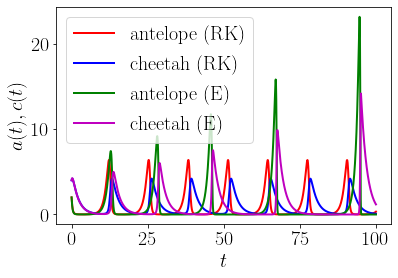

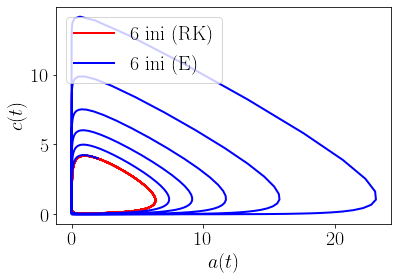

In [10]:
x0 = np.array([2, 4])
tmin = 0
tmax = 100

rk2 = Integrator(RK2(LotkaVolterra(1,1,0.5,0.5)),x0,tmin,tmax,2000)
eul = Integrator(ExplicitEuler(LotkaVolterra(1,1,0.5,0.5)),x0,tmin,tmax,2000)

plotData(rk2.getIntegrationTime(),rk2.integrate()[:,0],'r-',"antelope (RK)")
plotData(rk2.getIntegrationTime(),rk2.integrate()[:,1],'b-',"cheetah (RK)")
plotData(eul.getIntegrationTime(),eul.integrate()[:,0],'g-',"antelope (E)")
plotData(eul.getIntegrationTime(),eul.integrate()[:,1],'m-',"cheetah (E)")

plt.show()

parametricPlotData(rk2.integrate()[:,0], rk2.integrate()[:,1],'r-','a(t)','c(t)',"6 ini (RK)")
parametricPlotData(eul.integrate()[:,0], eul.integrate()[:,1],'b-','a(t)','c(t)',"6 ini (E)")

plt.show()